In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cart
import cartopy.io.img_tiles as cimgt
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import scipy.stats as stats
import calendar

In [ ]:
file_path = r"C:\Users\rbendopa\OneDrive - George Mason University - O365 Production\Class\Clim680\data\ao.long.nc"
ao = xr.open_dataset(file_path)
ao

<xarray.Dataset> Size: 11kB
Dimensions:  (time: 896)
Coordinates:
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2024-08-01
Data variables:
    value    (time) float32 4kB ...

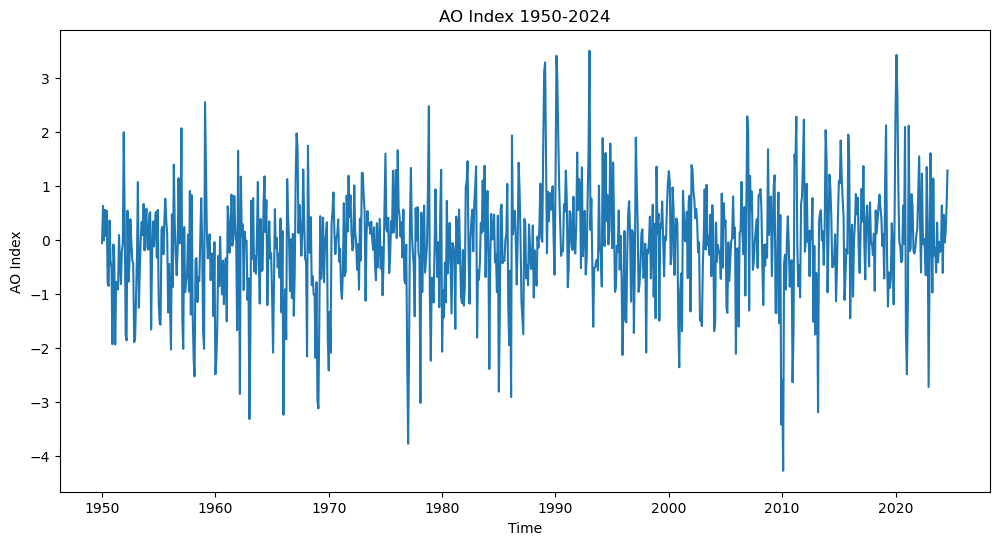

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(ao['time'], ao['value'])
plt.xlabel('Time')
plt.ylabel('AO Index')
plt.title('AO Index 1950-2024')
plt.grid
plt.show()

Positive AO:  42
Negative AO:  73
Neutral AO:  840
[array(42), array(73), array(840)]


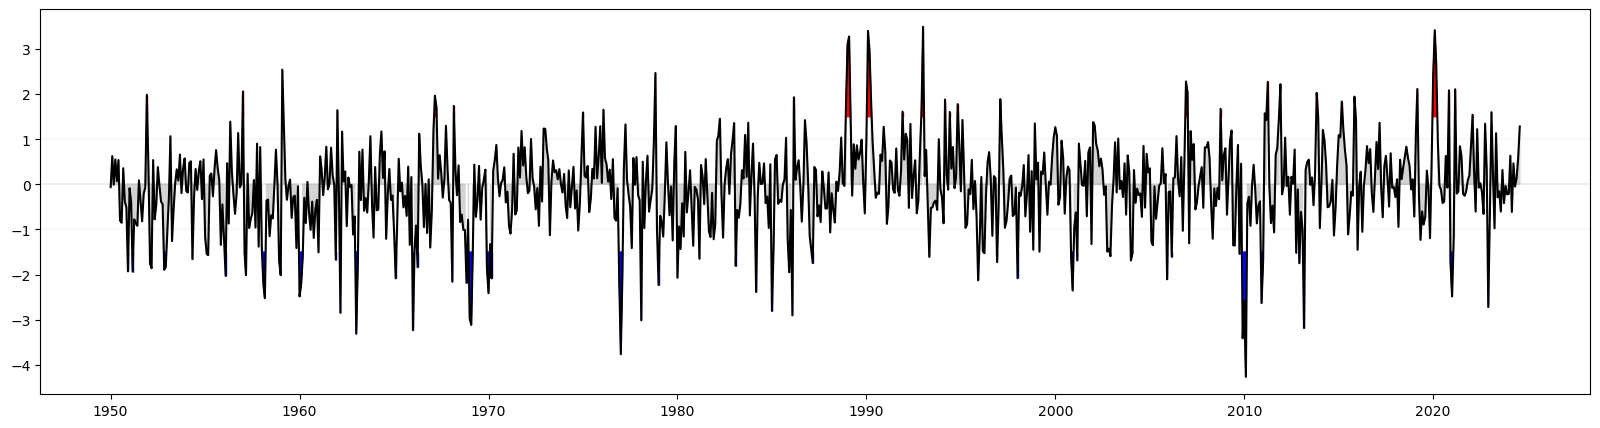

In [ ]:
positiveAO = ao['value'].where(ao['value']>=1.5)
negativeAO = ao['value'].where(ao['value']<=-1.5)
neutralAO = ao['value'].where(np.logical_and(ao['value']>-2, ao['value']<2))

print('Positive AO: ', positiveAO.count(dim='time').values)
print('Negative AO: ', negativeAO.count(dim='time').values)
print('Neutral AO: ', neutralAO.count(dim='time').values)
 
counts= [positiveAO.count(dim='time').values,
         negativeAO.count(dim='time').values,
        neutralAO.count(dim='time').values]
print(counts)

# labels = ['Positive AO', 'Negative AO', 'Neutral AO']

plt.figure(figsize=(20, 5))
plt.plot(ao['time'], ao['value'], 'k')
plt.fill_between(ao['time'].values, neutralAO, color='lightgray')
plt.fill_between(ao['time'].values, positiveAO, y2= 1.5, color='red')
plt.fill_between(ao['time'].values, negativeAO, y2= -1.5, color='blue')
plt.axhline(0, color='black', linewidth=0.1)
plt.axhline(1, color='black', linewidth=0.1, linestyle='dotted')
plt.axhline(-1, color='black', linewidth=0.1, linestyle='dotted')


In [ ]:
# Open the file with the ice concentration data
thepath = r"C:\Users\rbendopa\OneDrive - George Mason University - O365 Production\Class\Clim680\data\icec.mon.mean.nc"
ds_icec = xr.open_dataset(thepath)

# Select the time period
ds_icec = ds_icec.sel(time=slice(ao['time'][0],ao['time'][-1]))
ds_icec

<xarray.Dataset> Size: 218MB
Dimensions:  (lat: 180, lon: 360, time: 840)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
Data variables:
    icec     (time, lat, lon) float32 218MB ...
Attributes:
    title:            created 05/2014 from data provided by JRA
    history:          Created 12/2012 from data obtained from JRA by ESRL/PSD
    platform:         Analyses
    citation:         Hirahara, S., Ishii, M., and Y. Fukuda,2014: Centennial...
    institution:      NOAA ESRL/PSD
    Conventions:      CF-1.2
    dataset_title:    COBE-SST2 Sea Surface Temperature and Ice
    original_source:  https://climate.mri-jma.go.jp/pub/ocean/cobe-sst2/
    References:       https://www.psl.noaa.gov/data/gridded/cobe2.html

In [27]:
# Calculate the monthly climatology

icec_clim = ds_icec['icec'].groupby('time.month').mean(dim='time')
icec_anom = ds_icec['icec'].groupby('time.month') - icec_clim
icec_anom

<xarray.DataArray 'icec' (time: 840, lat: 180, lon: 360)> Size: 218MB
array([[[ 5.2856207e-03,  5.5714250e-03,  4.9999952e-03, ...,
          5.2856207e-03,  5.4286122e-03,  5.1428676e-03],
        [ 6.4285398e-03,  6.2856674e-03,  6.1428547e-03, ...,
          6.4286590e-03,  6.4285398e-03,  6.4285398e-03],
        [ 7.2855353e-03,  6.8570971e-03,  6.7141652e-03, ...,
          6.7141652e-03,  6.9998503e-03,  8.4282160e-03],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[ 3.7143230e-03,  3.4285188e-03,  3.8570762e-03, ...,
          3.5714507e-03,  3.7142038e-03,  3.4285188e-03],
        [ 4.9999952e-03,  5.0001144e-03,  5.2858591e-03, ...,
          4.7143102e-03,  4.8571825e-03,  4.7143102e-03],
        [ 6.9998503e-03,  7.1427226e-03,  7.2855353e-03, ...,
          6.4283013e-03,  6.7141056e-03,  8.2852840e-03],
...
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-1.0714352e-02, -1.0571599e-02, -1.0714352e-02, ...,
         -1.1285782e-02, -1.0857105e-02, -1.1000037e-02],
        [ 9.8572969e-03,  1.4305115e-04, -1.4275312e-04, ...,
         -1.4251471e-04, -2.8544664e-04, -1.4251471e-04],
        [ 4.2849779e-04,  2.8556585e-04,  2.8556585e-04, ...,
          1.4269352e-04, -2.8574467e-04,  2.2852421e-03],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2019-12-01
    month    (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

In [39]:
# Ensure the time values in positiveAO, negativeAO, and neutralAO are in icec_anom
common_times_positive = positiveAO.dropna(dim='time')['time'].to_index().intersection(icec_anom['time'].to_index())
common_times_negative = negativeAO.dropna(dim='time')['time'].to_index().intersection(icec_anom['time'].to_index())
common_times_neutral = neutralAO.dropna(dim='time')['time'].to_index().intersection(icec_anom['time'].to_index())

# Select the positive, negative, and neutral phases of the AO
positiveAO_icec = icec_anom.sel(time=common_times_positive)
negativeAO_icec = icec_anom.sel(time=common_times_negative)
neutralAO_icec = icec_anom.sel(time=common_times_neutral)

comp_icec = [positiveAO_icec, negativeAO_icec, neutralAO_icec]
comp_icec

[<xarray.DataArray 'icec' (time: 35, lat: 180, lon: 360)> Size: 9MB
 array([[[ 0.00928563,  0.00942838,  0.00928563, ...,  0.0087142 ,
           0.00914288,  0.00899994],
         [ 0.0098573 ,  0.01014298,  0.00985718, ...,  0.00985742,
           0.00971448,  0.00985742],
         [ 0.01042843,  0.0102855 ,  0.0102855 , ...,  0.01014262,
           0.00971419,  0.01228517],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],
 
        [[ 0.00528562,  0.00557142,  0.005     , ...,  0.00528562,
           0.00542861,  0.00514287],
         [ 0.00642854,  0.00628567,  0.00614285, ...,  0.00642866,
           0.00642854,  0.00642854],
         [ 0.00728554,  0.0068571 ,  0.00671417, ...,  0.00671417,
           0.006

Text(0.5, 0.98, 'Ice Concentration Anomalies During Different Phases of the AO')

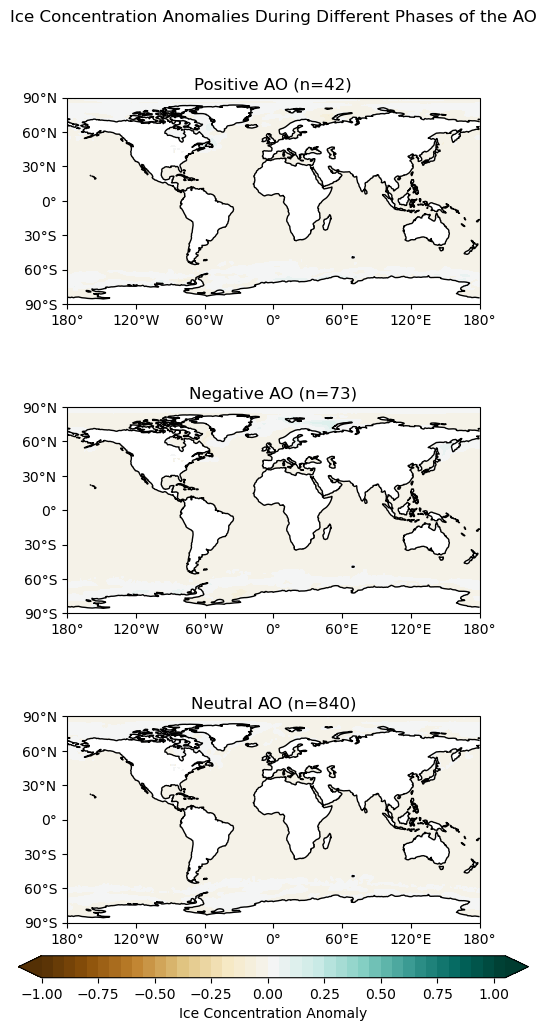

In [42]:
labels = ['Positive AO', 'Negative AO', 'Neutral AO']
clevs = np.arange(-1,1.1,0.05)

#Define the figure and each axis for the 3 rows and 4 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection':ccrs.PlateCarree()},
                        figsize=(8.5, 11))

# we will flatten in into a 1D array (just 3 rows)
axs=axs.flatten()

# Loop over the phases of the AO
for i, phase in enumerate(comp_icec):

        #Select the phase
        data = comp_icec[i].mean(dim='time')  # Average over the time dimension to get 2D data

        # Add cyclic point
        data, lons = add_cyclic_point(data, coord=comp_icec[i]['lon'])

        # Contour plot
        cs = axs[i].contourf(lons, comp_icec[i]['lat'], data, clevs,
                            transform=ccrs.PlateCarree(), 
                            cmap='BrBG', extend='both')
        
        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the phase of the AO
        axs[i].set_title(labels[i]+' (n='+str(counts[i])+')')

        # Draw coastlines for each subplot
        axs[i].coastlines()

# Adjust the location of the subplots
fig.subplots_adjust(bottom=0.15, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.02])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Ice Concentration Anomaly')

# Add a big title at the top
plt.suptitle('Ice Concentration Anomalies During Different Phases of the AO')

Text(0.5, 1.0, 'Sea Ice Concentration Anomaly')

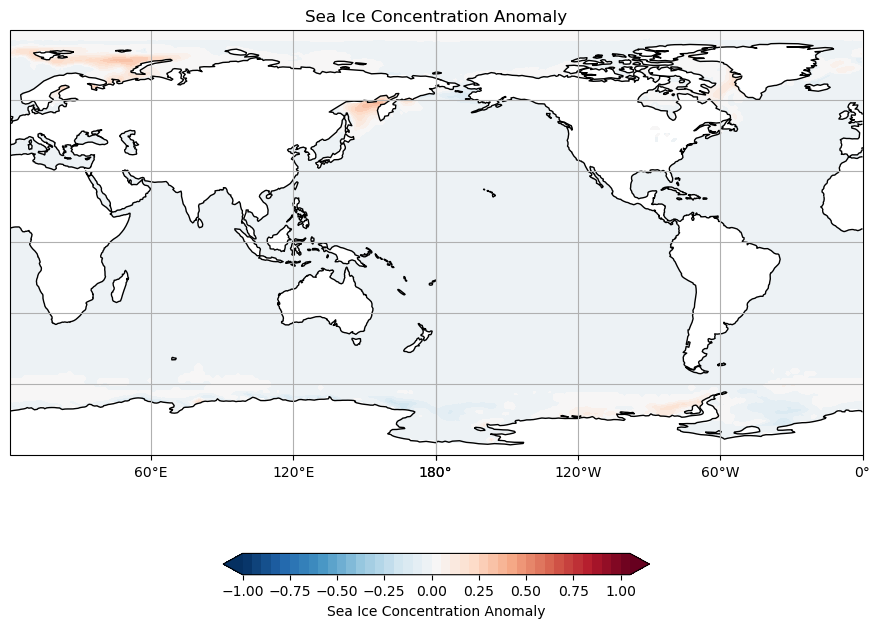

In [ ]:
labels = ['Positive AO', 'Negative AO', 'Neutral AO']
clevs = np.arange(-1,1.1,0.05)

#Define the figure and each axis for the 3 rows and 4 columns

fig = plt.figure(figsize=(11,8.5))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-180))

#Add cyclic point

cyclic_data, cyclic_lons = add_cyclic_point(icec_anom.values,coord=ds_icec['lon'])

#Make a filled contour plot
cs = ax.contourf(ds_icec['lon'],ds_icec['lat'],icec_anom[0,:,:],clevs,
                 transform=ccrs.PlateCarree(),
                 cmap='RdBu_r',extend='both')

#Add coastlines
ax.coastlines()

#Add gridlines
ax.gridlines()

#Define the xticks for longtitude
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# ax.set_extent([-180,180,20,90],ccrs.PlateCarree())
# Call the colorbar
cbar = plt.colorbar(cs,orientation='horizontal', shrink=0.5, 
                    label='Sea Ice Concentration Anomaly')

#Add a title
ax.set_title('Sea Ice Concentration Anomaly')


## Significance Testing

In [43]:
diff_icec = [positiveAO_icec-neutralAO_icec,
             negativeAO_icec-neutralAO_icec]

Text(0.5, 0.98, 'Sea Ice Concentration Anomalies During Different Phases of the AO')

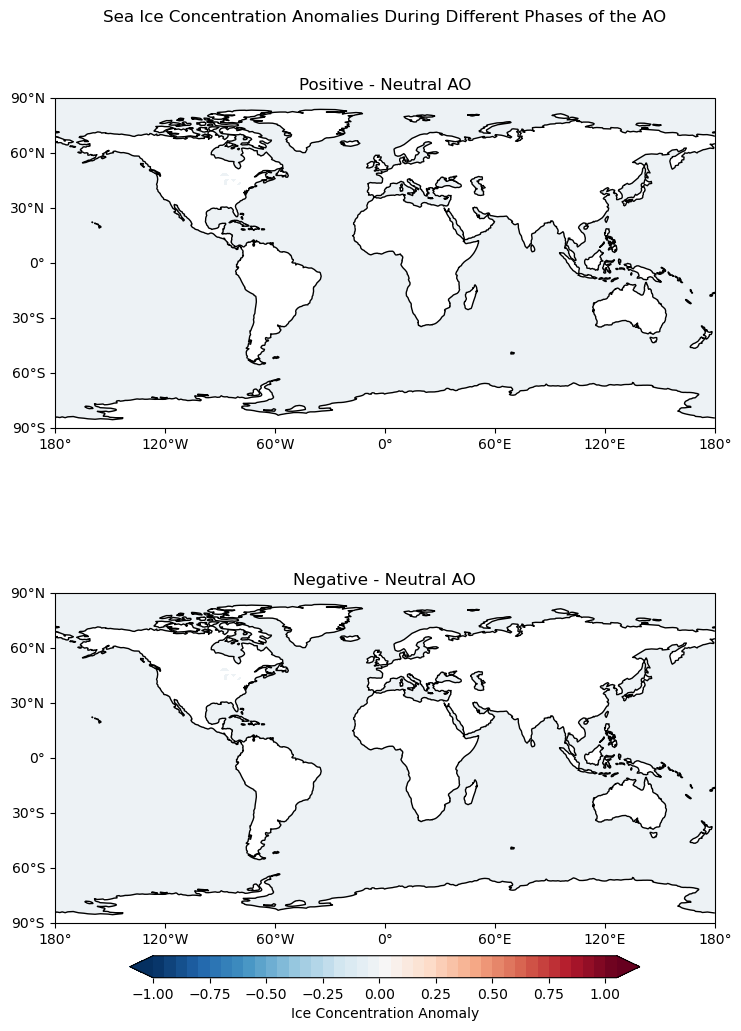

In [45]:
labels = ['Positive - Neutral AO', 'Negative - Neutral AO']
clevs = np.arange(-1,1.1,0.05)

#Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection':ccrs.PlateCarree()},
                        figsize=(8.5, 11))

# we will flatten in into a 1D array (just 2 rows)
axs=axs.flatten()

# Loop over the phases of the AO
for i, phase in enumerate(diff_icec):
    
            #Select the phase
            data = diff_icec[i].mean(dim='time')  # Average over the time dimension to get 2D data
    
            # Add cyclic point
            data, lons = add_cyclic_point(data, coord=diff_icec[i]['lon'])
    
            # Contour plot
            cs = axs[i].contourf(lons, diff_icec[i]['lat'], data, clevs,
                                transform=ccrs.PlateCarree(), 
                                cmap='RdBu_r', extend='both')
            
            # Longitude labels
            axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
            lon_formatter = cticker.LongitudeFormatter()
            axs[i].xaxis.set_major_formatter(lon_formatter)
    
            # Latitude labels
            axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
            lat_formatter = cticker.LatitudeFormatter()
            axs[i].yaxis.set_major_formatter(lat_formatter)
    
            # Title each subplot with the phase of the AO
            axs[i].set_title(labels[i])
    
            # Draw coastlines for each subplot
            axs[i].coastlines()

# Adjust the location of the subplots
fig.subplots_adjust(bottom=0.15, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.02])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Ice Concentration Anomaly')

# Add a big title at the top
plt.suptitle('Sea Ice Concentration Anomalies During Different Phases of the AO')

## Calculate significance using the built-in Stats Function


In [47]:
p = 0.05 # 95% confidence level

In [50]:
from scipy.stats import ttest_ind

# Positive vs. Neutral
positive_icec_vals = icec_anom.sel(time=common_times_positive).values
neutral_icec_vals = icec_anom.sel(time=common_times_neutral).values
negative_icec_vals = icec_anom.sel(time=common_times_negative).values

In [51]:
tstat, pval = ttest_ind(positive_icec_vals, 
                        neutral_icec_vals, 
                        equal_var=False)

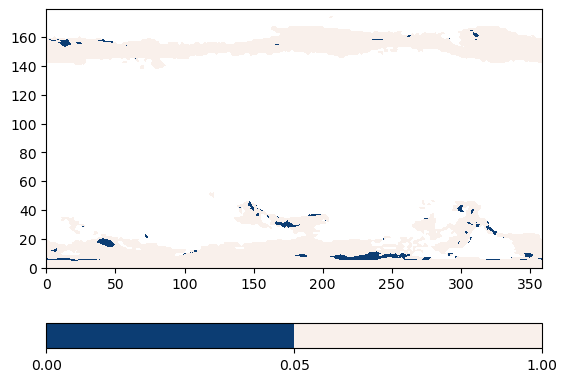

In [52]:
plt.contourf(pval, [0, 0.05, 1], cmap = 'RdBu_r')
plt.colorbar(orientation='horizontal')

## Make a mask of where the values are significant

In [54]:
mask_diff = diff_icec[0].where(pval < p)
mask_diff

<xarray.DataArray 'icec' (time: 21, lat: 180, lon: 360)> Size: 5MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 168B 1951-12-01 1962-01-01 ... 2015-11-01
    month    (time) int64 168B 12 1 3 4 3 1 2 3 12 3 4 12 12 3 6 11 2 10 2 3 11

## Plot our difference between composites and also mark where its significant

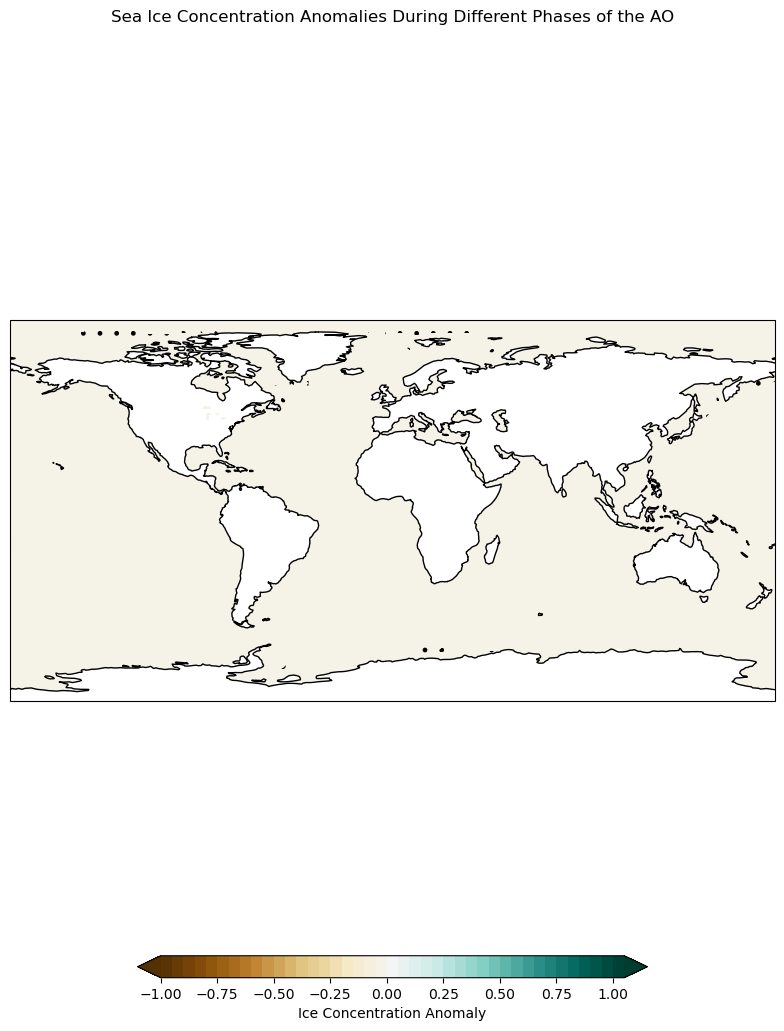

In [58]:
labels = ['Positive vs. Neutral AO']
clevs = np.arange(-1,1.1,0.05)
hatch_levs = [0, 1]

#Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection':ccrs.PlateCarree()},
                        figsize=(8.5, 11))

data = diff_icec[0].mean(dim='time')  # Average over the time dimension to get 2D data 

# Add cyclic point
data, lons = add_cyclic_point(data, coord=diff_icec[0]['lon'])
mask_data, lons = add_cyclic_point(mask_diff.mean(dim='time').values, coord=diff_icec[0]['lon'])

# Contour plot
cs = axs.contourf(lons, diff_icec[0]['lat'], data, clevs,
                transform=ccrs.PlateCarree(), 
                cmap='BrBG', extend='both')

# overlay of stippling for significance
ss = axs.contourf(lons, diff_icec[0]['lat'], mask_data, hatch_levs,
                transform=ccrs.PlateCarree(), 
                colors='none', hatches=['.', ''],
                extend='both', alpha=0.0)

#Draw coastlines
axs.coastlines()

# Adjust the location of the subplots
fig.subplots_adjust(bottom=0.15, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.02])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Ice Concentration Anomaly')

# Add a big title at the top
plt.suptitle('Sea Ice Concentration Anomalies During Different Phases of the AO')

plt.savefig('icec_anom.png', dpi=300)

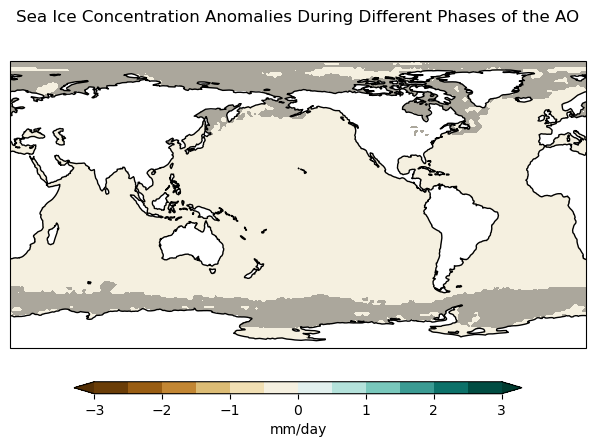

In [61]:
mask_diff_o = xr.ones_like(diff_icec[0]).where(pval > p) # This retains data where the pval is insignificant


labels= ['Positive vs. Neutral AO']
clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200.0)})

data=diff_icec[0].mean(dim='time')

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_icec[0]['lon'])
mask_data_o,lons=add_cyclic_point(mask_diff_o.mean(dim='time'),coord=diff_icec[0]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_icec[0]['lat'],data,clevs,
                transform = ccrs.PlateCarree(),
                cmap='BrBG',extend='both')

# Mask out insignficant areas with semi-transparent shading
ss=axs.contourf(lons,diff_icec[0]['lat'],mask_data_o,
                transform = ccrs.PlateCarree(),colors=['k'],
                alpha=0.3)

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Sea Ice Concentration Anomalies During Different Phases of the AO')

plt.savefig('stats_ttest.png',dpi=200)

# Non-parametric test

Text(0.5, 1.0, 'PDF of Ice Concentration Anomalies at 65N, 160E')

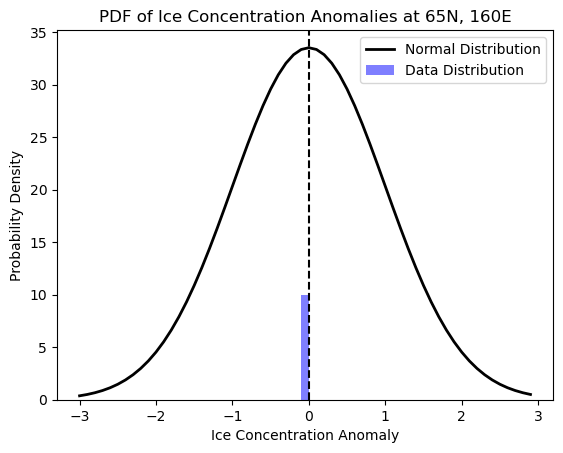

In [63]:
from scipy.stats import norm

lat, lon = 65 , -160
grid_anom = icec_anom.sel(lat=lat, lon=lon, method='nearest')

spacing = 0.1
xvals = np.arange(-3, 3, spacing)  
p_distrib = plt.hist(grid_anom, bins=xvals, density=True, alpha=0.5, color='b')

plt.plot(xvals, spacing*grid_anom.count().values*norm.pdf(xvals), 'k', linewidth=2)
plt.legend(['Normal Distribution', 'Data Distribution'])

plt.xlabel('Ice Concentration Anomaly')
plt.ylabel('Probability Density')

plt.axvline(0, color='k', linestyle='--')

slon = f"{lon}W"
if lon < 0:
    slon = f"{-lon}E"
slat = f"{lat}N"
if lat < 0:
    slat = f"{-lat}S"

plt.title(f'PDF of Ice Concentration Anomalies at {slat}, {slon}')

## Nonparametric statistics

In [65]:
test_val = 2.0

# Based on the assumption of a normal distribution, we can calculate the probability of observing a value greater than test_val
norm_prob = norm.sf(test_val, grid_anom.mean().values, grid_anom.std().values)

# Based on the actual data distribution, we can calculate the probability of observing a value greater than test_val
epsilon = 1e-6
test_bin = (np.argwhere(abs(p_distrib[1] - test_val) < epsilon) + 1)[0][0]
data_prob = 1.0 - p_distrib[0][:test_bin].sum()/grid_anom.count().values

print(f"Probability of observing a value greater than {test_val} based on the normal distribution: {norm_prob}: \
      \nNormal data distribution = {100*norm_prob: 0.2f}% \
       \nActual data distribution = {100*data_prob: 0.2f}%")


Probability of observing a value greater than 2.0 based on the normal distribution: nan:       
Normal data distribution =  nan%        
Actual data distribution =  98.81%


c:\Users\rbendopa\.conda\envs\climate\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2193: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [66]:
change = 0.99

# Based on the assumption of a normal distribution, we can calculate the value that corresponds to the probability of change
norm_value = norm.ppf(change, grid_anom.mean().values, grid_anom.std().values)

# Based on the actual data distribution, we can calculate the value that corresponds to the probability of change
data_value = np.quantile(grid_anom, change)

print(f"Value that corresponds to a probability of {100*change: 0.0f} based on the normal distribution: {norm_value}: \
        \nNormal data distribution = {data_value: 0.2f} \
        \nActual data distribution = {data_value: 0.2f}")

Value that corresponds to a probability of  99 based on the normal distribution: nan:         
Normal data distribution =  0.00         
Actual data distribution =  0.00


c:\Users\rbendopa\.conda\envs\climate\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2285: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\rbendopa\.conda\envs\climate\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2286: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
